<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Global-Feature-Reconstruction-Error-(GFRE)-and-Distortion-(GFRD)" data-toc-modified-id="Global-Feature-Reconstruction-Error-(GFRE)-and-Distortion-(GFRD)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Global Feature Reconstruction Error (GFRE) and Distortion (GFRD)</a></span></li></ul></div>

Global Feature Reconstruction Error (GFRE) and Distortion (GFRD)
================================================================

Example for the usage of the `skcosmo.metrics.global_reconstruction_error` as global feature reconstruction error (GFRE) and `skcosmo.metrics.global_reconstruction_distortion` global feature reconstruction distortion (GFRD) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skcosmo.datasets import load_degenerate_CH4_manifold
from skcosmo.metrics import (
    global_reconstruction_error,
    global_reconstruction_distortion,
)

# load features
degenerate_manifold = load_degenerate_CH4_manifold()
soap_features = degenerate_manifold.data.SOAP_power_spectrum
bispectrum_features = degenerate_manifold.data.SOAP_bispectrum

In [2]:
gfre_matrix = np.zeros((2, 2))
print("Computing GFRE...")
gfre_matrix[0, 0] = global_reconstruction_error(soap_features, soap_features)
gfre_matrix[0, 1] = global_reconstruction_error(soap_features, bispectrum_features)
gfre_matrix[1, 0] = global_reconstruction_error(bispectrum_features, soap_features)
gfre_matrix[1, 1] = global_reconstruction_error(
    bispectrum_features, bispectrum_features
)
print("Computing GFRE finished.")

Computing GFRE...
Computing GFRE finished.


In [3]:
gfrd_matrix = np.zeros((2, 2))
print("Computing GFRD...")
gfrd_matrix[0, 0] = global_reconstruction_distortion(soap_features, soap_features)
gfrd_matrix[0, 1] = global_reconstruction_distortion(soap_features, bispectrum_features)
gfrd_matrix[1, 0] = global_reconstruction_distortion(bispectrum_features, soap_features)
gfrd_matrix[1, 1] = global_reconstruction_distortion(
    bispectrum_features, bispectrum_features
)
print("Computing GFRD finished.")

Computing GFRD...
Computing GFRD finished.


It can be seen that the reconstruction of the 4-body features using 3-body features has a nonnegligible error showing that 4-body features adds additional information in a linear regression sense for this dataset. Furthermore, it can be seen that 3-body features can be reconstructed using 4-body with a negligible error but high distortion.

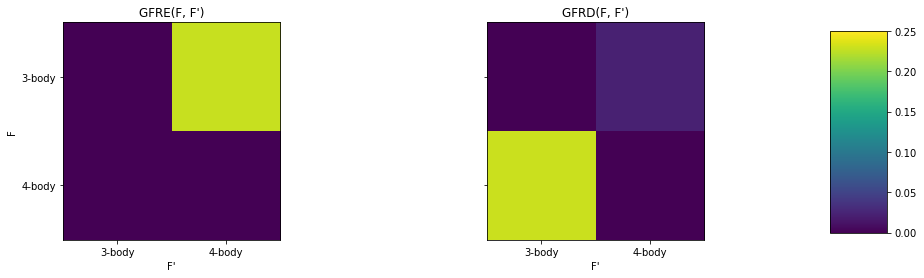

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
pcm1 = axes[0].imshow(gfre_matrix, vmin=0, vmax=0.25)
pcm2 = axes[1].imshow(gfrd_matrix, vmin=0, vmax=0.25)
axes[0].set_ylabel("F")
axes[0].set_xlabel("F'")
axes[1].set_xlabel("F'")
axes[0].set_title("GFRE(F, F')")
axes[1].set_title("GFRD(F, F')")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["3-body", "4-body"])
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["3-body", "4-body"])
axes[0].set_yticks([0, 1])
axes[0].set_yticklabels(["3-body", "4-body"])
axes[1].set_yticks([0, 1])
axes[1].set_yticklabels(["", ""])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(pcm2, cax=cbar_ax)
plt.show()